In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [57]:
housing_data = pd.read_csv("train.csv")
test_housing_data = pd.read_csv("test.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# housing_data.describe(include = "all")
housing_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# Data information:
print("Total variables: 80 + 1(Target variable),\nTarget Variable: SalePrice,\nTotal indexes(data entries):1460,\nNAN values present:YES,\nObject Features present:YES,\n\nFeatures to be ignored for prediction: [Id, PoolQC,Fence,MiscFeature,Alley]")

Total variables: 80 + 1(Target variable),
Target Variable: SalePrice,
Total indexes(data entries):1460,
NAN values present:YES,
Object Features present:YES,

Features to be ignored for prediction: [Id, PoolQC,Fence,MiscFeature,Alley]


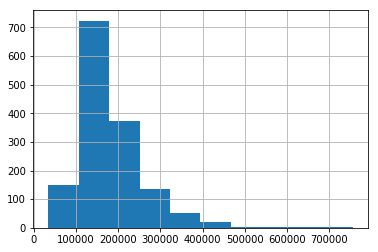

In [6]:
housing_data['SalePrice'].hist()

In [60]:
tr_data = housing_data.drop(["Id", "PoolQC", "Fence", "MiscFeature", "Alley"], axis=1)
test_housing_data = test_housing_data.drop(["Id", "PoolQC", "Fence", "MiscFeature", "Alley"], axis=1)
# y = housing_data['SalePrice']

In [61]:
# handling missing values
for each_col in tr_data:
    if (tr_data[each_col].dtype == 'int64' or tr_data[each_col].dtype == 'float64'):
        tr_data[each_col] = tr_data[each_col].fillna(tr_data[each_col].mean())
    elif (tr_data[each_col].dtype == 'object'):
        tr_data[each_col] = tr_data[each_col].fillna(method='ffill')
tr_data['FireplaceQu'] = tr_data['FireplaceQu'].fillna(method = 'bfill')

for each_col in test_housing_data:
    if (test_housing_data[each_col].dtype == 'int64' or test_housing_data[each_col].dtype == 'float64'):
        test_housing_data[each_col] = test_housing_data[each_col].fillna(test_housing_data[each_col].mean())
    elif (test_housing_data[each_col].dtype == 'object'):
        test_housing_data[each_col] = test_housing_data[each_col].fillna(method='ffill')
test_housing_data['FireplaceQu'] = test_housing_data['FireplaceQu'].fillna(method = 'bfill')

In [9]:
encoder_cols = []
for each in tr_data:
    print("\n\nColumn-->> {2}\tUnique data:{0} \n Count:{1}".format(tr_data[each].unique(), len(tr_data[each].unique()), each))
    if len(tr_data[each].unique()) < 50:
        encoder_cols.append(each)



Column-->> MSSubClass	Unique data:[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 
 Count:15


Column-->> MSZoning	Unique data:['RL' 'RM' 'C (all)' 'FV' 'RH'] 
 Count:5


Column-->> LotFrontage	Unique data:[ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          72.          66.         101.
  57.          44.         110.          98.          47.
 108.         112.          74.         115.          61.
  48.          33.          52.         100.          24.
  89.          63.          76.          81.          95.
  69.          21.          32.          78.         121.
 122.          40.         105.          73.          77.
  64.          94.          34.          90.          55.
  88.          82.          71.         120.         107.
  92.         134.          62.          86.         141.
  97.          54.          41.          79.         174.
  99.          67.      

In [10]:
print(len(encoder_cols),encoder_cols)
year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

57 ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [11]:
encoder_cols_df = pd.DataFrame()
for each_col in encoder_cols:
    encoder_cols_df[each_col] = tr_data[each_col]

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [13]:
l_en = LabelEncoder()
X_1 = encoder_cols_df.apply(l_en.fit_transform)

In [14]:
print(len(X_1.columns))
X_1.head()

57


,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,1,3,3,0,4,0,5,2,...,4,4,2,0,0,0,1,2,8,4
1,0,3,1,3,3,0,2,0,24,1,...,4,4,2,0,0,0,4,1,8,4
2,5,3,1,0,3,0,4,0,5,2,...,4,4,2,0,0,0,8,2,8,4
3,6,3,1,0,3,0,0,0,6,2,...,4,4,2,0,0,0,1,0,8,0
4,5,3,1,0,3,0,2,0,15,2,...,4,4,2,0,0,0,11,2,8,4


In [15]:
for i in year_cols:
    print("\nColumn: {0}\tMin : {1}\tMax : {2}".format(i,tr_data[i].min(),tr_data[i].max()))


Column: YearBuilt	Min : 1872	Max : 2010

Column: YearRemodAdd	Min : 1950	Max : 2010

Column: GarageYrBlt	Min : 1900.0	Max : 2010.0


In [16]:
y_map = {}
yrr = 1870
for i in range(0,10):
    y_map.update({i+1 : list(range(yrr, yrr+16))})
    yrr += 15

In [17]:
##year mapping data
print(y_map)

{1: [1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885], 2: [1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900], 3: [1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915], 4: [1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930], 5: [1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945], 6: [1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960], 7: [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975], 8: [1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990], 9: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005], 10: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2

In [18]:
def year_encoading(col_val):
    col_val = [k for k,v in y_map.items() if int(col_val) in v]
    if col_val:
        col_val = int(col_val[0])
    else: print(col_val)
    return  col_val
# tr_data['YearBuilt'][:10]

In [19]:
X_2 = pd.DataFrame()
X_2['YearBuilt'] = tr_data['YearBuilt'].apply(year_encoading)
X_2['YearRemodAdd'] = tr_data['YearRemodAdd'].apply(year_encoading)
X_2['GarageYrBlt'] = tr_data['GarageYrBlt'].apply(year_encoading)

In [20]:
X_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
GarageYrBlt     1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


In [21]:
cols = [c for c in tr_data.columns if (c not in list(X_1.columns))]
cols.remove('YearRemodAdd')
cols.remove('YearBuilt')
cols.remove('GarageYrBlt')

print(len(cols), cols)

16 ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


In [22]:
X_2['LotFrontage'] = tr_data['LotFrontage'].astype(int)
X_2['LotArea'] = tr_data['LotArea']
X_2['MasVnrArea'] = tr_data['MasVnrArea'].astype(int)
X_2['BsmtFinSF1'] = tr_data['BsmtFinSF1']
X_2['BsmtFinSF2'] = tr_data['BsmtFinSF2']
X_2['BsmtUnfSF'] = tr_data['BsmtUnfSF']
X_2['TotalBsmtSF'] = tr_data['TotalBsmtSF']
X_2['1stFlrSF'] = tr_data['1stFlrSF']
X_2['2ndFlrSF'] = tr_data['2ndFlrSF']
X_2['GrLivArea'] = tr_data['GrLivArea']
X_2['GarageArea'] = tr_data['GarageArea']
X_2['WoodDeckSF'] = tr_data['WoodDeckSF']
X_2['OpenPorchSF'] = tr_data['OpenPorchSF']
X_2['EnclosedPorch'] = tr_data['EnclosedPorch']
X_2['ScreenPorch'] = tr_data['ScreenPorch']
X_2['SalePrice'] = tr_data['SalePrice']

In [72]:
X = pd.concat([X_1, X_2], axis=1)

In [73]:
crr = X.corr()
print(crr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.534591
YearBuilt        0.527239
YearRemodAdd     0.514116
MasVnrArea       0.475227
GarageYrBlt      0.467092
Fireplaces       0.466929
BsmtFinSF1       0.386420
Foundation       0.382479
LotFrontage      0.334897
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
Electrical       0.234945
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood     0.210851
                   ...   
Street           0.041036
BsmtFinType2     0.036981
LandContour      0.015453
MasVnrType       0.013363
Condition2       0.007513
BsmtFinSF2      -0.011378
Utilities       -0.014314
BsmtHalfBath

In [74]:
X_high_corr_cols = [i for i,j in list(zip(crr,crr["SalePrice"])) if abs(j) > 0.5]
X_low_corr_cols = [i for i,j in list(zip(crr,crr["SalePrice"])) if abs(j) < 0.3]
X_high_corr_cols.remove('SalePrice')
X_high_corr_cols

['OverallQual',
 'ExterQual',
 'BsmtQual',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'GarageCars',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea']

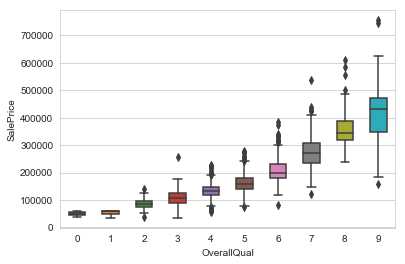

In [75]:
sns.set_style("whitegrid")
sns.boxplot(x = "OverallQual", y = "SalePrice", data= X, width= 0.5)

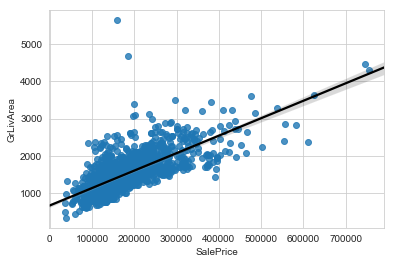

In [26]:
# plt.xlabel("Sale Price")
# plt.ylabel("Gr Liv Area")
# plt.scatter(X["SalePrice"], X["GrLivArea"], s=7)
sns.regplot(X["SalePrice"], X["GrLivArea"], line_kws={'color': 'black'})
plt.show()

In [76]:
#removing cols with low corelation values
print(X.shape)
X = X.drop(X_low_corr_cols , axis=1)
print(X.shape)

(1460, 76)
(1460, 26)


In [77]:
y = X['SalePrice']
y =  np.log1p(y)
X = X.drop('SalePrice', axis = 1)

In [101]:
# Building Decision Tree model
from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

dt_reg = DecisionTreeRegressor(random_state = 10)

# params = [{'min_samples_split':[3,9,15],'min_samples_leaf':[3,5,7],'max_depth': [5, 7, 9]}]
# ~0.18774669601169833
# params = [{'min_samples_split':[15, 20 , 25],'min_samples_leaf':[8, 10, 12],'max_depth': [9,11,15]}]
# ~0.18546150833592856
params = [{'min_samples_split':[14, 15, 16],'min_samples_leaf':[12, 15 , 20],'max_depth': [10, 11, 12]}]

grid_search_cv = GridSearchCV(estimator = dt_reg,
                           param_grid = params,
                           scoring = 'neg_mean_squared_error',
                           cv = 5,           
                           n_jobs = -1)

grid_search_cv = grid_search_cv.fit(X, y)

In [102]:
best_scoring = grid_search_cv.best_score_
rmse_regress = np.sqrt(np.abs(best_scoring))
print("root mean square error - DecisionTreeRegressor: ",rmse_regress)

best_parameters = grid_search_cv.best_params_
print("best_parameters:",best_parameters)

root mean square error - DecisionTreeRegressor:  0.18546150833592856
best_parameters: {'max_depth': 11, 'min_samples_leaf': 12, 'min_samples_split': 14}


In [99]:
from sklearn.ensemble import RandomForestRegressor

ran_for_reg = RandomForestRegressor(random_state=10)
params = [{'n_estimators': [300, 400, 500], 'min_samples_split': [6, 9, 12],'min_samples_leaf': [6, 8, 10],'max_depth': [10, 11, 12]}]

grid_search_cv = GridSearchCV(estimator = ran_for_reg,
                           param_grid = params,
                           scoring = 'neg_mean_squared_error',
                           cv = 5,           
                           n_jobs = -1)

grid_search_cv = grid_search_cv.fit(X, y)
best_scoring = grid_search_cv.best_score_
rmse_regress = np.sqrt(np.abs(best_scoring))
print("root mean square error - RandomForestRegressor: ",rmse_regress)

best_parameters = grid_search_cv.best_params_
print("best_parameters:",best_parameters)


root mean square error - RandomForestRegressor:  0.15488575561664275
best_parameters: {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 300}
